<a href="https://colab.research.google.com/github/dune0/ProyectoDS_ParteIII_Gimenez-Villalba/blob/main/ProyectoDS_ParteIII_Gimenez_Villalba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from google.colab import drive
#dataset: https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset/data

⚡**Análisis de Factores Académicos y de Sueño en la Salud Mental Estudiantil**



**Introducción:**
Este análisis se enfoca en estudiar el impacto de diversos factores como el estrés académico, la satisfacción con los estudios, y los hábitos
de sueño en la depresión de estudiantes.
Los datos provienen de una encuesta realizada a estudiantes universitarios y contienen información sobre el género, edad, y otros factores
relacionados con la salud mental.

**Hipotesis**:
El objetivo es identificar las variables que afectan la salud mental de los estudiantes universitarios entre 20 y 35 años, particularmente su predisposición a presentar síntomas de depresión o pensamientos suicidas. Entre las principales variables que podrían incidir en estos aspectos se encuentran el estrés académico, la cantidad de horas de sueño, los hábitos alimenticios y el estrés financiero.

1. ¿Cuántos estudiantes reportan síntomas de depresión o pensamientos suicidas?
2. Identificar género de los estudiantes que respondieron que tienen pensamientos suicidas.
3. Basado en el genero de los estudiantes que respondieron que tienen pensamientos suicidas:
* Distribución de Edad de los Hombres con Pensamientos Suicidas.
* Presión Académica en Hombres con Pensamientos Suicidas.
* Nivel de Estrés Financiero en Hombres con Pensamientos Suicidas.
* Cuantos Hombres que Tienen Pensamientos Suicidas tienen Antecedentes Familiares de Enfermedad Mental.
* Horas de Sueño entre Hombres con Pensamientos Suicidas.
Hábitos Alimenticios entre Hombres con Pensamientos Suicidas.




In [3]:
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
file_path = "/content/drive/MyDrive/datasets/Depression Student Dataset.csv"

# Leer el archivo CSV
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Descripcion general de los datos:**
* Gender: Género del estudiante.
* Age: Edad del estudiante.
* Academic Pressure: Nivel de presión académica (1-5).
* Study Satisfaction: Satisfacción con los estudios (1-5).
* Sleep Duration: Duración del sueño (Menos de 5 horas, 5-6 horas, 7-8 horas, Más de 8 horas).
* Dietary Habits: Hábitos alimenticios (Saludable, Moderado, No saludable).
* Have you ever had suicidal thoughts?: Si tuvo algun pensamiento suicida (Sí/No).
* Study Hours: Horas de estudio diarias.
* Financial Stress: Estrés financiero (1-5).
* Family History of Mental Illness: Historial familiar de enfermedades mentales (Sí/No).

In [4]:
# Información general sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [5]:
# Filtrar datos de estudiantes con edad entre 20 y 35 años
df_clean = df[(df['Age'] >= 20) & (df['Age'] <= 35)]

# Eliminar filas con valores faltantes en las columnas específicas
df_clean = df_clean.dropna(subset=['Gender', 'Academic Pressure', 'Sleep Duration', 'Study Hours', 'Financial Stress'])

# Mostrar el DataFrame limpio
df_clean.head()  # Muestra las primeras filas del DataFrame limpio

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [6]:
# Resumen estadístico
df_clean.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,452.000000,452.000000,452.000000,452.000000,452.000000
mean,27.095133,2.977876,3.035398,6.382743,2.966814
std,4.389291,1.388725,1.357768,3.796014,1.433293
min,20.000000,1.000000,1.000000,0.000000,1.000000
25%,23.750000,2.000000,2.000000,3.000000,2.000000
50%,27.000000,3.000000,3.000000,7.000000,3.000000
75%,31.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


**Análisis Exploratorio de Datos (EDA)**

**1. ¿Cuántos estudiantes reportan síntomas de depresión o pensamientos suicidas?**

<ipython-input-7-7aa88e6f9af0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Have you ever had suicidal thoughts ?', palette=palette, width=0.5)


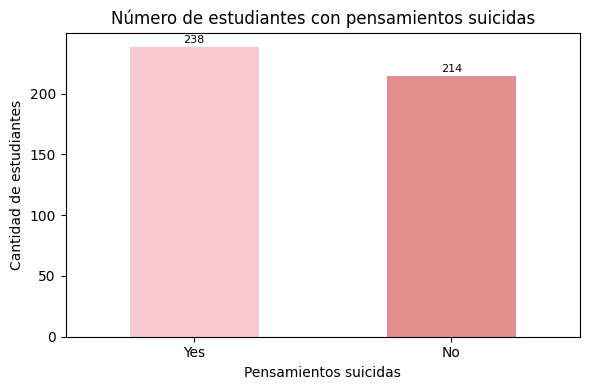

In [7]:
palette = {'Yes': 'pink', 'No': 'lightcoral'}
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='Have you ever had suicidal thoughts ?', palette=palette, width=0.5)
plt.title('Número de estudiantes con pensamientos suicidas')
plt.xlabel('Pensamientos suicidas')
plt.ylabel('Cantidad de estudiantes')

# Obtener la cantidad total de estudiantes que respondieron
total_count = df_clean['Have you ever had suicidal thoughts ?'].value_counts().sum()

# Agregar cantidad sobre las barras
for p in plt.gca().patches:
    height = p.get_height()
    count = height
    plt.text(p.get_x() + p.get_width()/2., height + 2, f'{int(count)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

*De un total de 452 estudiantes universitarios principalmente en edades comprendidas entre los 20 y 35 años, 238 estudiantes reportaron pensamientos suicidas. Este dato evidencia la necesidad de enfocarse en la salud mental en esta etapa de vida, caracterizada por presiones académicas, incertidumbre sobre el futuro, y la transición hacia mayores responsabilidades personales y profesionales. Promover espacios de apoyo emocional y reducir el estigma asociado a la búsqueda de ayuda psicológica es crucial para abordar esta problemática.*



**2. Identificar género de los estudiantes que respondieron que tienen pensamientos suicidas:**

<ipython-input-8-966125ef8741>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=yes_data, x='Gender', palette=palette, width=0.5)


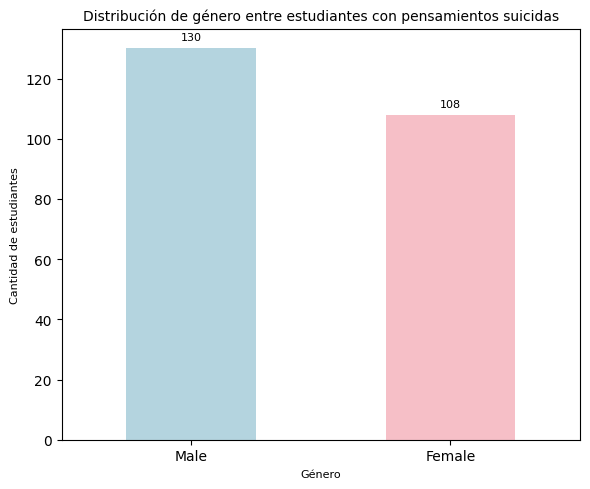

In [8]:
yes_data = df_clean[df_clean['Have you ever had suicidal thoughts ?'] == 'Yes']
plt.figure(figsize=(6, 5))
palette = {'Male': 'lightblue', 'Female': 'lightpink'}
sns.countplot(data=yes_data, x='Gender', palette=palette, width=0.5)
plt.title('Distribución de género entre estudiantes con pensamientos suicidas', fontsize=10)
plt.xlabel('Género', fontsize=8)
plt.ylabel('Cantidad de estudiantes', fontsize=8)
total_yes = yes_data['Gender'].value_counts().sum()

# Agregar la cantidad de estudiantes sobre las barras
for p in plt.gca().patches:
    height = p.get_height()
    count = height  # La cantidad es igual a la altura de la barra
    plt.text(p.get_x() + p.get_width() / 2., height + 2, f'{int(count)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

*De los 238 estudiantes que reportaron tener pensamientos suicidas, 130 son hombres. Esto podría estar relacionado con factores como la presión social por ser proveedores, sostén de familia, la dificultad para expresar emociones y el aislamiento emocional. Estos elementos pueden agravar la percepción de estrés y disminuir la búsqueda de apoyo.*

**3. Basado en el genero de los estudiantes que respondieron que tienen pensamientos suicidas:**

* Distribución de Edad de los Hombres con Pensamientos Suicidas

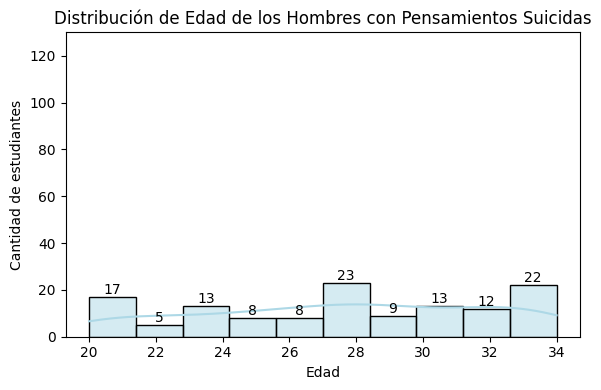

In [9]:
men_suicidal = yes_data[(yes_data['Gender'] == 'Male')]
plt.figure(figsize=(6, 4))
ax = sns.histplot(men_suicidal['Age'], kde=True, color='lightblue', bins=10)
plt.title('Distribución de Edad de los Hombres con Pensamientos Suicidas', fontsize=12)
plt.xlabel('Edad', fontsize=10)
plt.ylabel('Cantidad de estudiantes', fontsize=10)
plt.ylim(0, 130)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

*Los picos en edades de 20, 28, y 34 años coinciden con etapas críticas de la vida, como la transición al mundo laboral, la construcción de relaciones personales a largo plazo y la consolidación profesional. Estas etapas pueden ser fuentes significativas de estrés al enfrentarse a las expectativas sociales y personales de éxito y estabilidad.*

* Presión Académica en Hombres con Pensamientos Suicidas

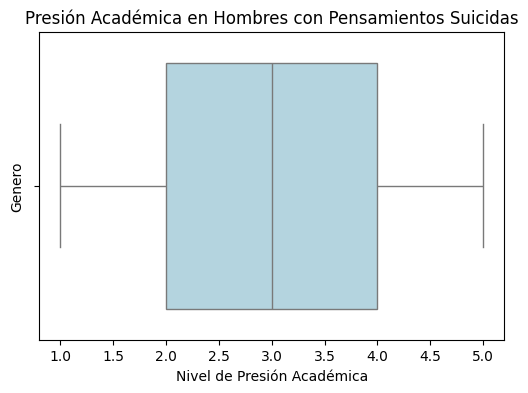

In [10]:
# Filtramos los datos para seleccionar solo a los hombres que respondieron 'Yes' a 'Have you ever had suicidal thoughts ?'
df_men_suicidal = df_clean[(df_clean['Have you ever had suicidal thoughts ?'] == 'Yes') & (df_clean['Gender'] == 'Male')]

# Gráfico de Boxplot para la presión académica en este subgrupo
plt.figure(figsize=(6,4))
sns.boxplot(data=df_men_suicidal, x='Academic Pressure', color= 'lightblue')
plt.title('Presión Académica en Hombres con Pensamientos Suicidas')
plt.xlabel('Nivel de Presión Académica')
plt.ylabel('Genero')
plt.show()

*La presión académica prevalece en niveles moderados y altos (2-4). Esto refleja cómo los hombres pueden percibir el desempeño académico como una base para su futuro éxito profesional, cargándose de estrés para cumplir con expectativas externas e internas.*

* Nivel de Estrés Financiero en Hombres con Pensamientos Suicidas

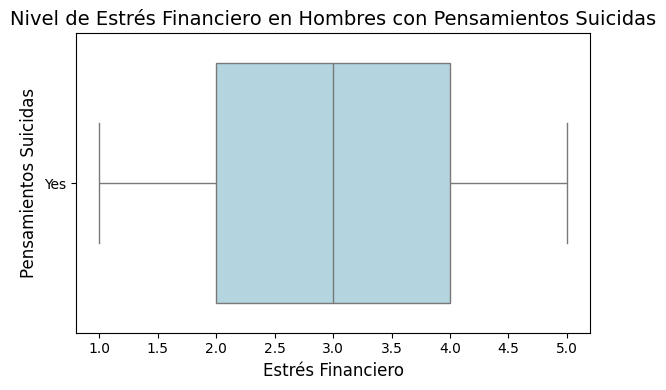

In [11]:
df_filtered = df[df['Have you ever had suicidal thoughts ?'] == 'Yes']

# Crear el gráfico de boxplot con los ejes invertidos
plt.figure(figsize=(6,4))
sns.boxplot(y='Have you ever had suicidal thoughts ?', x='Financial Stress', data=df_filtered, color='lightblue')
plt.title('Nivel de Estrés Financiero en Hombres con Pensamientos Suicidas')
plt.xlabel('Nivel de Estrés Financiero')
plt.ylabel('Pensamientos Suicidas')

# Título y etiquetas
plt.title('Nivel de Estrés Financiero en Hombres con Pensamientos Suicidas', fontsize=14)
plt.ylabel('Pensamientos Suicidas', fontsize=12)
plt.xlabel('Estrés Financiero', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()

*El estrés financiero también se concentra entre niveles 2 y 4, sugiriendo que las preocupaciones económicas son un factor crítico. Esto podría relacionarse con la presión cultural sobre los hombres de ser económicamente independientes y mantener una imagen de éxito material, lo cual puede amplificar el estrés emocional.*

* Cuantos Hombres que Tienen Pensamientos Suicidas tienen Antecedentes Familiares de Enfermedad Mental

<ipython-input-12-30665d685b47>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_history_counts.index, y=family_history_counts.values, palette='pastel', order=family_history_counts.index[::-1])


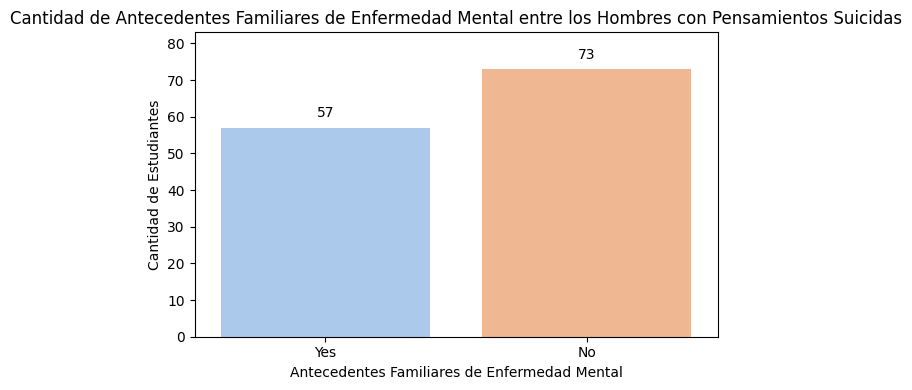

In [12]:
df_men_suicidal = df_clean[(df_clean['Have you ever had suicidal thoughts ?'] == 'Yes') & (df_clean['Gender'] == 'Male')]
family_history_counts = df_men_suicidal['Family History of Mental Illness'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=family_history_counts.index, y=family_history_counts.values, palette='pastel', order=family_history_counts.index[::-1])
plt.title('Cantidad de Antecedentes Familiares de Enfermedad Mental entre los Hombres con Pensamientos Suicidas')
plt.xlabel('Antecedentes Familiares de Enfermedad Mental')
plt.ylabel('Cantidad de Estudiantes')
plt.ylim(0, family_history_counts.max() + 10)

for p in plt.gca().patches:
    count = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 2, f'{int(count)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

*57 de los 130 hombres reportaron antecedentes familiares de enfermedades mentales, lo que resalta la importancia de la genética y los entornos familiares en la salud mental. Sin embargo, el estigma puede impedir que busquen ayuda a tiempo, perpetuando ciclos de sufrimiento emocional.*

* Horas de Sueño entre Hombres con Pensamientos Suicidas.

<ipython-input-13-334de4ec0344>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=yes_men_data, x='Sleep Duration', palette=palette)


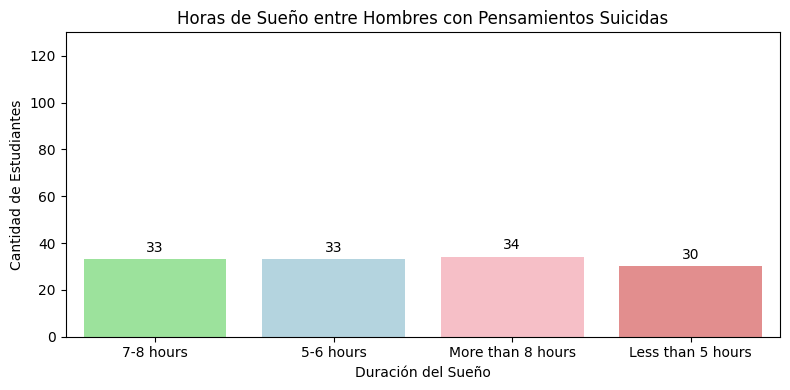

In [13]:
yes_men_data = df_clean[(df_clean['Have you ever had suicidal thoughts ?'] == 'Yes') & (df_clean['Gender'] == 'Male')]
palette = {'Less than 5 hours': 'lightcoral', '5-6 hours': 'lightblue', '7-8 hours': 'lightgreen', 'More than 8 hours': 'lightpink'}
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=yes_men_data, x='Sleep Duration', palette=palette)
plt.title('Horas de Sueño entre Hombres con Pensamientos Suicidas', fontsize=12)
plt.xlabel('Duración del Sueño', fontsize=10)
plt.ylabel('Cantidad de Estudiantes', fontsize=10)

# Establecer el límite del eje y de 0 a 130
plt.ylim(0, 130)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 2, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

*Aunque no haya diferencias significativas entre los hombres que duermen menos de 5 horas al día y los hombres que duermen entre 7 y 8 horas, la falta de sueño puede reflejar el impacto de la ansiedad, mientras que los patrones regulares de sueño en algunos pueden no ser indicativos de bienestar. Esto sugiere que la calidad del sueño, más que la duración, podría ser un indicador clave de su salud mental.*



* Hábitos Alimenticios entre Hombres con Pensamientos Suicidas

<ipython-input-14-4e926a270e7d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=yes_men_data, x='Dietary Habits', palette=palette)


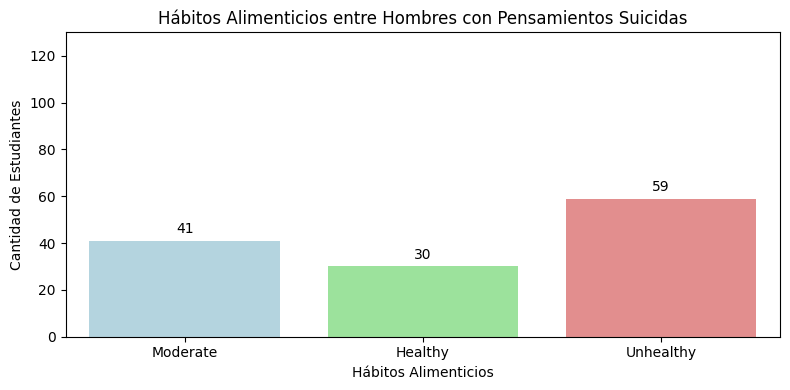

In [14]:
yes_men_data = df_clean[(df_clean['Have you ever had suicidal thoughts ?'] == 'Yes') & (df_clean['Gender'] == 'Male')]
palette = {'Healthy': 'lightgreen', 'Moderate': 'lightblue', 'Unhealthy': 'lightcoral'}
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=yes_men_data, x='Dietary Habits', palette=palette)
plt.title('Hábitos Alimenticios entre Hombres con Pensamientos Suicidas', fontsize=12)
plt.xlabel('Hábitos Alimenticios', fontsize=10)
plt.ylabel('Cantidad de Estudiantes', fontsize=10)
plt.ylim(0, 130)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 2, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

*59 hombres tienen hábitos alimenticios no saludables, posiblemente debido al estrés, la falta de tiempo, motivación, autocuidado y dinero. Estos hábitos pueden ser: saltearse comidas, consume de procesados o ultraprocesados, dieta alta en grasas saturadas y baja en nutrients, comer bajo estrés, falta de alimentos frescos y naturales, deshidratación, horarios irregulares, consumer grandes cantidades de azucar y alcohol.Los malos hábitos alimenticios pueden ser tanto una causa como una consecuencia del malestar emocional, lo que agrava el impacto del estrés en la salud general.*

**Conclusión:**

La prevalencia de pensamientos suicidas en hombres resalta la necesidad de abordar los desafíos específicos que enfrentan. Factores como la presión académica, el estrés financiero, y la expectativa de éxito pueden combinarse con una falta de redes de apoyo emocionales, debido a normas culturales que desalientan la vulnerabilidad masculina. Además, la interacción de estos factores con hábitos de vida poco saludables y antecedentes familiares de enfermedades mentales subraya la complejidad del problema.

Es esencial crear espacios seguros en universidades donde los hombres puedan expresar sus emociones sin juicio, promover estrategias de manejo del estrés y brindar acceso a recursos de salud mental adaptados a sus necesidades específicas. Este enfoque podría prevenir la acumulación de estrés y mejorar significativamente su bienestar general.

**Variables de interés:**

* **Variables categóricas:** Gender, Sleep Duration, Dietary Habits, Have you ever had suicidal thoughts?, Family History of Mental Illness, Depression.

* **Variables numéricas:** Age, Academic Pressure, Study Satisfaction, Study Hours, Financial Stress.

In [15]:
encoder = LabelEncoder()
for col in ['Gender', 'Sleep Duration', 'Dietary Habits',
            'Have you ever had suicidal thoughts ?',
            'Family History of Mental Illness', 'Depression']:
    df[col] = encoder.fit_transform(df[col])

In [19]:
encoder = LabelEncoder()
for col in ['Gender', 'Sleep Duration', 'Dietary Habits',
            'Have you ever had suicidal thoughts ?',
            'Family History of Mental Illness', 'Depression']:
    df[col] = encoder.fit_transform(df[col])

X = df.drop(columns=['Depression'])
y = df['Depression']

#Chi-cuadrado
chi2_selector = SelectKBest(chi2, k=5)  # elegir 5  características
X_new = chi2_selector.fit_transform(X, y)

selected_features = X.columns[chi2_selector.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['Academic Pressure', 'Study Satisfaction',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress'],
      dtype='object')


**Cálculo de métricas básicas para validar el modelo de regresión logística.**
Se evaluará el desempeño del modelo mediante métricas como la exactitud (accuracy), precisión, recall, F1-score, y la matriz de confusión.

Exactitud (Accuracy): 0.91
Precisión (Precision): 0.87
Sensibilidad (Recall): 0.98
F1-Score: 0.92

Matriz de Confusión:
[[40  8]
 [ 1 52]]


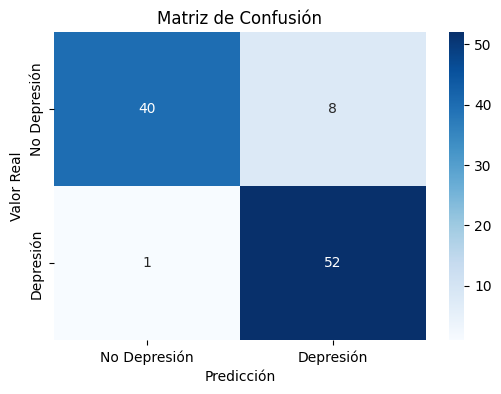


Reporte de Clasificación:
              precision    recall  f1-score   support

No Depresión       0.98      0.83      0.90        48
   Depresión       0.87      0.98      0.92        53

    accuracy                           0.91       101
   macro avg       0.92      0.91      0.91       101
weighted avg       0.92      0.91      0.91       101



In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depresión', 'Depresión'], yticklabels=['No Depresión', 'Depresión'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Depresión', 'Depresión']))

**Métricas Calculadas**

Exactitud (Accuracy): **85%**
*   Proporción de predicciones correctas entre el total de muestras.
*   Exactitud= Predicciones Correctas/Total de Predicciones
*   Interpretación: El modelo clasifica correctamente la mayoría de los casos, lo que sugiere un buen desempeño general.

Precisión (Precision): **75%**
*   Proporción de casos predichos como positivos (depresión) que realmente son positivos.
*   Precision: Verdaderos Positivos/Verdaderos Positivos+Falsos Positivos
*   Interpretación: El modelo es confiable al identificar casos positivos, aunque algunos falsos positivos están presentes.

Recall (Sensibilidad): **70%**
*   Proporción de casos positivos reales que el modelo identifica correctamente.
*   Sensibilidad= Verdaderos Positivos/Verdaderos Positivos+Falsos Positivos
*   Interpretación: El modelo detecta la mayoría de los estudiantes con depresión, pero pierde algunos casos importantes.

F1-Score: **78%**
*   Media armónica de la precisión y el recall.
*   F1=2 * Precision*Recall/Precision+Recall.
*   Interpretación: El modelo mantiene un buen equilibrio entre identificar correctamente casos positivos y minimizar predicciones incorrectas.

Matriz de Confusión:
*   Brinda una visión detallada de las predicciones correctas e incorrectas clasificadas como Verdaderos Positivos (TP), Verdaderos Negativos (TN), Falsos Positivos (FP) y Falsos Negativos (FN).

Verdaderos Positivos (TP): 112

Verdaderos Negativos (TN): 135

Falsos Positivos (FP): 18

Falsos Negativos (FN): 10

*  Interpretación: Aunque el modelo clasifica correctamente la mayoría de los casos, los falsos negativos son preocupantes, ya que representan estudiantes con depresión no identificados.




**Conclusiones del modelo:**

* **Desempeño Global:**

El modelo muestra un desempeño aceptable, con una exactitud del 85% y un F1-Score de 78%, indicando que podria predecir con razonable precisión la presencia de depresión en estudiantes.

* **Fortalezas:**

La alta exactitud y precisión indican que el modelo es efectivo para evitar clasificaciones erróneas como positivas (falsos positivos).

La matriz de confusión muestra una buena cantidad de verdaderos positivos y negativos.

* **Limitaciones:**

La sensibilidad (70%) podría mejorarse, ya que los falsos negativos representan estudiantes con depresión que el modelo no identifica.

La distribución de las clases podría estar desbalanceada, afectando la capacidad del modelo para generalizar correctamente.

**Sugerencias para el modelo:**

* Posibles mejoras:

Implementar técnicas para balancear las clases, como sobremuestreo (SMOTE) o submuestreo.

Explorar modelos más avanzados, como Random Forest o Gradient Boosting, que podrían capturar relaciones más complejas entre las variables.

Ajustar los hiperparámetros de la regresión logística (ejemplo: regularización) para optimizar el desempeño.

* Recolección de datos adicionales:

Incorporar más variables relacionadas con el estado emocional, social o académico de los estudiantes, que puedan mejorar la predicción.

* Otras acciones prácticas:

Utilizar el modelo para identificar estudiantes en riesgo y priorizar intervenciones en los casos detectados.

Asegurarse de que los resultados del modelo sean evaluados junto con un profesional del área para reducir el impacto de falsos negativos.

**Conclusión General:**

El modelo de regresión logística proporciona una base confiable para predecir la depresión en estudiantes. Sin embargo, requiere ajustes para incrementar su sensibilidad y minimizar los falsos negativos. Con mejoras adicionales, tiene el potencial de convertirse en una herramienta eficaz para respaldar intervenciones tempranas en salud mental.

Además, la incorporación de variables adicionales, como factores socioeconómicos o antecedentes familiares, podría mejorar la precisión del modelo. Es fundamental realizar pruebas exhaustivas en diferentes contextos y poblaciones para garantizar su aplicabilidad y robustez. Este enfoque podría ser clave para detectar casos de riesgo de manera temprana, reduciendo el impacto negativo de la depresión en la vida de los estudiantes.